In [ ]:
import sys

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from prepare_dataset import prepare_dataset
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})

sys.path.append('../src')
import rccr

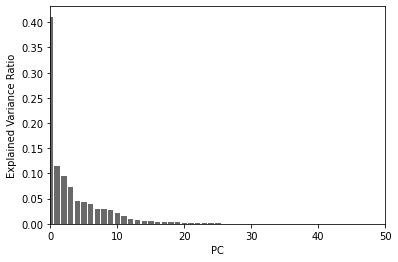

2
Initial r2 0.18576213620993132Initial r2 0.18576213620993132
Initial r2 0.18576213620993132Initial r2 0.18576213620993132


Iteration 0 0.4464839770823179
Iteration 0 0.4456348012738958
Iteration 0 0.4515976270282599
Iteration 0 0.45086911895880605
Iteration 1 0.4841602235187204
Iteration 1 0.4844157502132264
Iteration 1 0.5460410363489065
Iteration 1 0.5267041849894544
Iteration 2 0.485613495938581
Iteration 2 0.4854262112390615
Iteration 2 0.5590304875088977
Iteration 2 0.5577958006898824
Iteration 3 0.48563947978804256
Iteration 3 0.4855180858888309
Iteration 3 0.5636730342987757
Iteration 3 0.5625202619606615
Final r2 0.48563947978804256
Initial r2 0.18576213620993132
Final r2 0.48563947978804256
Final r2 0.5661250437144228
Final r2 0.5660730392505344
Initial r2 0.18576213620993132
Initial r2 0.18576213620993132
Initial r2 0.18576213620993132
Iteration 0 0.43281526206758214
Iteration 0 0.4068915954155269
Iteration 0 0.4463895808855302
Iteration 0 0.46339926663688324
Iteration 1 0

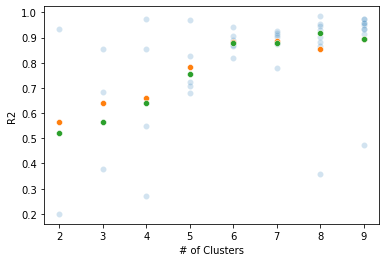

In [2]:
df = prepare_dataset('../data/Palladium_Database.xlsx')
df_train, df_test = train_test_split(df,test_size=0.1, random_state=25)

X_train = df_train.iloc[:,6:]
X_test = df_test.iloc[:,6:]
y_train = df_train['DDG']
y_test = df_test['DDG']

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA().fit(X_train_scaled)
pcs = pca.transform(X_train_scaled)[:,:20]
pcs_test = pca.transform(X_test_scaled)[:,:20]

plt.bar(range(0,len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, color='dimgrey')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.xlim(0,50)
plt.show()

cluster_list = []
average_r2_list = []
r2_list = []
full_r2 = []
labels = []
for i in range(2,10):
    print(i)
    new_labels = rccr.get_average_clusters(pcs,y_train.values,n_clusters=i,iterations=40,max_iteration_cluster=5, plot=False)
    labels.append(new_labels)
    cr_meas, cr_pred, clusters = rccr.cr_fit(pcs,y_train.values,labels=new_labels)
    full_r2.append(r2_score(cr_meas,cr_pred))
    temp = []
    for cluster in np.unique(clusters):
        index = clusters == cluster
        r2_list.append(r2_score(cr_meas[index[:,0]],cr_pred[index[:,0]]))
        cluster_list.append(i)
        temp.append(r2_score(cr_meas[index[:,0]],cr_pred[index[:,0]]))
    average_r2_list.append(np.average(temp))
sns.scatterplot(x=cluster_list,y=r2_list, alpha=0.2)
sns.scatterplot(x=range(2,10),y=average_r2_list)
sns.scatterplot(x=range(2,10), y=full_r2)
plt.xlabel('# of Clusters')
plt.ylabel('R2')
plt.show()

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

def make_sim(labels):
    original = np.zeros((len(labels),len(labels)))
    for label1,row1 in enumerate(labels):
        for label2, row2 in enumerate(labels):
            original[label1,label2] = (row1 == row2)
    return(original)

def re_order_indices(similarity_matrix):
    distance_matrix = 1 - similarity_matrix
    linkage_matrix = linkage(squareform(distance_matrix), method='average')
    ordered_indices = leaves_list(linkage_matrix)
    
    return(ordered_indices)

def re_order_array(similarity_matrix,ordered_indices):
    reordered_matrix = similarity_matrix[ordered_indices, :][:, ordered_indices]   
    return(reordered_matrix)

In [8]:
original = np.zeros((np.shape(labels)[1],np.shape(labels)[1]))

base_cluster = 6-2
original = make_sim(labels[base_cluster])
new_indices = re_order_indices(original)



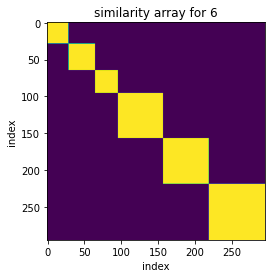

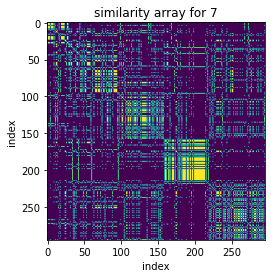

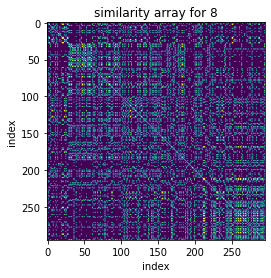

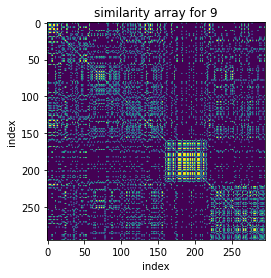

In [12]:
for cluster in [4,5,6,7]:    
    c7 = np.zeros((np.shape(labels)[1],np.shape(labels)[1]))
    for label1,row1 in enumerate(labels[cluster]):
        for label2, row2 in enumerate(labels[cluster]):
            c7[label1,label2] = (row1 == row2) # Creates 1 layer by determining if two entries have the same cluster label

    new_array = re_order_array(c7, new_indices)

    plt.imshow(new_array)
    plt.title(f'similarity array for {cluster+2}')
    plt.xlabel('index')
    plt.ylabel('index')
    plt.show()